# Try Chainladder-Python Online
If you are here to try `chainladder-python` for the first time, you are in the right place!

With the help of Google Colab, you will be able to try the package online, without any installation or additional setup.

You should use a blank copy of this workbook.

It's best that you work on your version of the workbook, while comparing this site directly for additional commentary and check your solutions to the exercises.

# Disclaimer
Note that a lot of the examples shown might not be applicable in a real world scenario, and is only meant to demonstrate some of the functionalities included in the package. The user should always follow all applicable laws, the Code of Professional Conduct, applicable Actuarial Standards of Practice, and exercise their best actuarial judgement.

# Setting Up
We will first need to install the package, as Google Colab's default environment doesn't have the chainladder package pre-installed. You will need to run this step using your terminal instead of using a python notebook when you are ready to install the package on your machine.

Simply execute `pip install chainladder`, Colab is smart enough to know that this is not a piece of python code, but to execute it in shell. FYI, `pip` stands for "Package Installer for Python".

In [1]:
pip install chainladder

Note: you may need to restart the kernel to use updated packages.


Other commonly used packages, such as `numpy`, `pandas`, and `matplotlib` are already pre-installed, we just need to load them into our environment.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import chainladder as cl

<IPython.core.display.Javascript object>

Let's check the version of chainladder that we have.

In [3]:
print("chainladder", cl.__version__)

chainladder 0.8.13


<IPython.core.display.Javascript object>

# Your Journey Begins

Let's begin by looking at a sample dataset, called `clrd`, which is hosted on https://raw.githubusercontent.com/casact/chainladder-python/master/chainladder/utils/data/clrd.csv.

Let's load the dataset into the memory with `pandas`, then inspect it.

In [4]:
clrd_df = pd.read_csv(
    "https://raw.githubusercontent.com/casact/chainladder-python/master/chainladder/utils/data/clrd.csv"
)
clrd_df.head()

,GRCODE,GRNAME,AccidentYear,DevelopmentYear,DevelopmentLag,IncurLoss,CumPaidLoss,BulkLoss,EarnedPremDIR,EarnedPremCeded,EarnedPremNet,Single,PostedReserve97,LOB
0,86,Allstate Ins Co Grp,1988,1988,1,367404,70571,127737,400699,5957,394742,0,281872,wkcomp
1,86,Allstate Ins Co Grp,1988,1989,2,362988,155905,60173,400699,5957,394742,0,281872,wkcomp
2,86,Allstate Ins Co Grp,1988,1990,3,347288,220744,27763,400699,5957,394742,0,281872,wkcomp
3,86,Allstate Ins Co Grp,1988,1991,4,330648,251595,15280,400699,5957,394742,0,281872,wkcomp
4,86,Allstate Ins Co Grp,1988,1992,5,354690,274156,27689,400699,5957,394742,0,281872,wkcomp


<IPython.core.display.Javascript object>

Can you list all of the unique accident years? How many are there?

In [5]:
clrd_df["AccidentYear"].unique()

array([1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997])

<IPython.core.display.Javascript object>

In [6]:
clrd_df["AccidentYear"].nunique()

10

<IPython.core.display.Javascript object>

# Triangle Basics

Let's instantiate the `clrd_df` dataset and build a triangle object. Let's call it `clrd_tri`.

In [7]:
clrd_tri = cl.Triangle(
    clrd_df,
    origin="AccidentYear",
    development="DevelopmentYear",
    columns=["IncurLoss", "CumPaidLoss", "BulkLoss", "EarnedPremDIR", "EarnedPremCeded", "EarnedPremNet"],
    index = "LOB",
    cumulative=True,
)
clrd_tri

,Triangle Summary
Valuation:,1997-12
Grain:,OYDY
Shape:,"(6, 6, 10, 10)"
Index:,[LOB]
Columns:,"[IncurLoss, CumPaidLoss, BulkLoss, EarnedPremDIR, EarnedPremCeded, EarnedPremNet]"


<IPython.core.display.Javascript object>

What does the paid triangle look like?

In [8]:
clrd_tri["CumPaidLoss"].sum()

,12,24,36,48,60,72,84,96,108,120
1988,"3,577,780","7,059,966","8,826,151","9,862,687","10,474,698","10,814,576","10,994,014","11,091,363","11,171,590","11,203,949"
1989,"4,090,680","7,964,702","9,937,520","11,098,588","11,766,488","12,118,790","12,311,629","12,434,826","12,492,899",
1990,"4,578,442","8,808,486","10,985,347","12,229,001","12,878,545","13,238,667","13,452,993","13,559,557",,
1991,"4,648,756","8,961,755","11,154,244","12,409,592","13,092,037","13,447,481","13,642,414",,,
1992,"5,139,142","9,757,699","12,027,983","13,289,485","13,992,821","14,347,271",,,,
1993,"5,653,379","10,599,423","12,953,812","14,292,516","15,005,138",,,,,
1994,"6,246,447","11,394,960","13,845,764","15,249,326",,,,,,
1995,"6,473,843","11,612,151","14,010,098",,,,,,,
1996,"6,591,599","11,473,912",,,,,,,,
1997,"6,451,896",,,,,,,,,


<IPython.core.display.Javascript object>

How about incurred?

In [9]:
clrd_tri["IncurLoss"].sum()

,12,24,36,48,60,72,84,96,108,120
1988,"11,644,995","11,674,240","11,653,597","11,630,882","11,593,868","11,551,625","11,463,312","11,420,238","11,415,560","11,396,981"
1989,"13,123,290","13,118,789","13,113,024","13,050,144","12,959,037","12,866,709","12,787,372","12,757,420","12,743,440",
1990,"14,776,079","14,670,690","14,479,699","14,324,680","14,183,178","14,033,498","13,948,139","13,925,679",,
1991,"15,318,373","15,112,547","14,877,662","14,615,540","14,380,205","14,205,778","14,154,882",,,
1992,"16,828,857","16,457,307","15,999,385","15,538,214","15,249,286","15,161,066",,,,
1993,"18,169,370","17,590,902","17,080,187","16,485,467","16,281,774",,,,,
1994,"19,414,898","18,609,089","17,854,178","17,521,037",,,,,,
1995,"19,502,850","18,668,388","17,901,550",,,,,,,
1996,"19,142,090","17,910,743",,,,,,,,
1997,"18,113,581",,,,,,,,,


<IPython.core.display.Javascript object>

The `clrd` dataset's `IncurLoss` actually includes IBNR, to get the case incurred, we would have to take out `BulkLoss`. Let's try to get the case incurred triangle.

In [10]:
clrd_tri["IncurLoss"].sum() - clrd_tri["BulkLoss"].sum()

,12,24,36,48,60,72,84,96,108,120
1988,"7,778,398","9,872,876","10,537,707","10,973,808","11,175,391","11,265,524","11,288,288","11,305,023","11,323,995","11,327,627"
1989,"8,734,319","10,844,720","11,822,136","12,279,311","12,481,505","12,567,543","12,608,487","12,633,539","12,639,258",
1990,"9,325,252","11,913,461","12,985,113","13,459,843","13,646,077","13,718,445","13,755,879","13,768,960",,
1991,"9,564,486","12,159,826","13,216,383","13,659,541","13,821,032","13,903,084","13,964,163",,,
1992,"10,539,619","13,125,930","14,120,971","14,563,964","14,755,405","14,850,140",,,,
1993,"11,402,448","14,043,343","15,095,232","15,576,086","15,775,057",,,,,
1994,"12,411,107","15,005,424","16,095,699","16,650,937",,,,,,
1995,"12,686,394","15,140,099","16,223,016",,,,,,,
1996,"12,627,293","14,956,778",,,,,,,,
1997,"12,705,993",,,,,,,,,


<IPython.core.display.Javascript object>

# Pandas-like Operations

Let's see how `.iloc[...]` and `.loc[...]` similarly to pandas. They take 4 parameters: [index, column, origin, valuation].

What if we want the row from AY 1998 `CumPaidLoss` data?

In [11]:
clrd_tri.iloc[:, 1, 0, :].sum()

,12,24,36,48,60,72,84,96,108,120
1988,"3,577,780","7,059,966","8,826,151","9,862,687","10,474,698","10,814,576","10,994,014","11,091,363","11,171,590","11,203,949"


<IPython.core.display.Javascript object>

What if you only want the value at age 60?

In [12]:
clrd_tri.iloc[:, 1, 0, 4].sum()

10474698.0

<IPython.core.display.Javascript object>

Let's use `.loc[...]` to get the `CumPaidLoss` triangle.

In [13]:
clrd_tri.loc[:, "CumPaidLoss", :, :].sum()

,12,24,36,48,60,72,84,96,108,120
1988,"3,577,780","7,059,966","8,826,151","9,862,687","10,474,698","10,814,576","10,994,014","11,091,363","11,171,590","11,203,949"
1989,"4,090,680","7,964,702","9,937,520","11,098,588","11,766,488","12,118,790","12,311,629","12,434,826","12,492,899",
1990,"4,578,442","8,808,486","10,985,347","12,229,001","12,878,545","13,238,667","13,452,993","13,559,557",,
1991,"4,648,756","8,961,755","11,154,244","12,409,592","13,092,037","13,447,481","13,642,414",,,
1992,"5,139,142","9,757,699","12,027,983","13,289,485","13,992,821","14,347,271",,,,
1993,"5,653,379","10,599,423","12,953,812","14,292,516","15,005,138",,,,,
1994,"6,246,447","11,394,960","13,845,764","15,249,326",,,,,,
1995,"6,473,843","11,612,151","14,010,098",,,,,,,
1996,"6,591,599","11,473,912",,,,,,,,
1997,"6,451,896",,,,,,,,,


<IPython.core.display.Javascript object>

What if you only want the row from 1992 accident year?

In [14]:
clrd_tri.loc[:, "CumPaidLoss", "1992", :].sum()

,12,24,36,48,60,72,84,96,108,120
1992,"5,139,142","9,757,699","12,027,983","13,289,485","13,992,821","14,347,271",,,,


<IPython.core.display.Javascript object>

How do we get the latest `CumPaidLoss` diagonal only?

In [15]:
clrd_tri["CumPaidLoss"].sum().latest_diagonal

,1997
1988,"11,203,949"
1989,"12,492,899"
1990,"13,559,557"
1991,"13,642,414"
1992,"14,347,271"
1993,"15,005,138"
1994,"15,249,326"
1995,"14,010,098"
1996,"11,473,912"
1997,"6,451,896"


<IPython.core.display.Javascript object>

Very often, we want incremental triangles instead. Let's convert the `CumPaidLoss` triangle to the incremental form.

In [16]:
clrd_tri["CumPaidLoss"].sum().cum_to_incr()

,12,24,36,48,60,72,84,96,108,120
1988,"3,577,780","3,482,186","1,766,185","1,036,536","612,011","339,878","179,438","97,349","80,227","32,359"
1989,"4,090,680","3,874,022","1,972,818","1,161,068","667,900","352,302","192,839","123,197","58,073",
1990,"4,578,442","4,230,044","2,176,861","1,243,654","649,544","360,122","214,326","106,564",,
1991,"4,648,756","4,312,999","2,192,489","1,255,348","682,445","355,444","194,933",,,
1992,"5,139,142","4,618,557","2,270,284","1,261,502","703,336","354,450",,,,
1993,"5,653,379","4,946,044","2,354,389","1,338,704","712,622",,,,,
1994,"6,246,447","5,148,513","2,450,804","1,403,562",,,,,,
1995,"6,473,843","5,138,308","2,397,947",,,,,,,
1996,"6,591,599","4,882,313",,,,,,,,
1997,"6,451,896",,,,,,,,,


<IPython.core.display.Javascript object>

We can also convert the triangle to the valuation format, what we often see on Schedule Ps.

In [17]:
clrd_tri["CumPaidLoss"].sum().dev_to_val()

,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997
1988,"3,577,780","7,059,966","8,826,151","9,862,687","10,474,698","10,814,576","10,994,014","11,091,363","11,171,590","11,203,949"
1989,,"4,090,680","7,964,702","9,937,520","11,098,588","11,766,488","12,118,790","12,311,629","12,434,826","12,492,899"
1990,,,"4,578,442","8,808,486","10,985,347","12,229,001","12,878,545","13,238,667","13,452,993","13,559,557"
1991,,,,"4,648,756","8,961,755","11,154,244","12,409,592","13,092,037","13,447,481","13,642,414"
1992,,,,,"5,139,142","9,757,699","12,027,983","13,289,485","13,992,821","14,347,271"
1993,,,,,,"5,653,379","10,599,423","12,953,812","14,292,516","15,005,138"
1994,,,,,,,"6,246,447","11,394,960","13,845,764","15,249,326"
1995,,,,,,,,"6,473,843","11,612,151","14,010,098"
1996,,,,,,,,,"6,591,599","11,473,912"
1997,,,,,,,,,,"6,451,896"


<IPython.core.display.Javascript object>

Another function that is often useful is the `.heatmap()` method. Let's inspect the incremental paid amount and see if there are trends.

In [18]:
clrd_tri["CumPaidLoss"].sum().cum_to_incr().heatmap()

,12,24,36,48,60,72,84,96,108,120
1988,"3,577,780","3,482,186","1,766,185","1,036,536","612,011","339,878","179,438","97,349","80,227","32,359"
1989,"4,090,680","3,874,022","1,972,818","1,161,068","667,900","352,302","192,839","123,197","58,073",
1990,"4,578,442","4,230,044","2,176,861","1,243,654","649,544","360,122","214,326","106,564",,
1991,"4,648,756","4,312,999","2,192,489","1,255,348","682,445","355,444","194,933",,,
1992,"5,139,142","4,618,557","2,270,284","1,261,502","703,336","354,450",,,,
1993,"5,653,379","4,946,044","2,354,389","1,338,704","712,622",,,,,
1994,"6,246,447","5,148,513","2,450,804","1,403,562",,,,,,
1995,"6,473,843","5,138,308","2,397,947",,,,,,,
1996,"6,591,599","4,882,313",,,,,,,,
1997,"6,451,896",,,,,,,,,


<IPython.core.display.Javascript object>

# Development

How can we get the `CumPaidLoss` link ratios?

In [19]:
clrd_tri["CumPaidLoss"].sum().link_ratio

,12-24,24-36,36-48,48-60,60-72,72-84,84-96,96-108,108-120
1988,1.9733,1.2502,1.1174,1.0621,1.0324,1.0166,1.0089,1.0072,1.0029
1989,1.9470,1.2477,1.1168,1.0602,1.0299,1.0159,1.0100,1.0047,
1990,1.9239,1.2471,1.1132,1.0531,1.0280,1.0162,1.0079,,
1991,1.9278,1.2446,1.1125,1.0550,1.0271,1.0145,,,
1992,1.8987,1.2327,1.1049,1.0529,1.0253,,,,
1993,1.8749,1.2221,1.1033,1.0499,,,,,
1994,1.8242,1.2151,1.1014,,,,,,
1995,1.7937,1.2065,,,,,,,
1996,1.7407,,,,,,,,


<IPython.core.display.Javascript object>

We can also apply a `.heatmap()` to make it too, to help us visualize the highs and lows.

In [20]:
clrd_tri["CumPaidLoss"].sum().link_ratio.heatmap()

,12-24,24-36,36-48,48-60,60-72,72-84,84-96,96-108,108-120
1988,1.9733,1.2502,1.1174,1.0621,1.0324,1.0166,1.0089,1.0072,1.0029
1989,1.9470,1.2477,1.1168,1.0602,1.0299,1.0159,1.0100,1.0047,
1990,1.9239,1.2471,1.1132,1.0531,1.0280,1.0162,1.0079,,
1991,1.9278,1.2446,1.1125,1.0550,1.0271,1.0145,,,
1992,1.8987,1.2327,1.1049,1.0529,1.0253,,,,
1993,1.8749,1.2221,1.1033,1.0499,,,,,
1994,1.8242,1.2151,1.1014,,,,,,
1995,1.7937,1.2065,,,,,,,
1996,1.7407,,,,,,,,


<IPython.core.display.Javascript object>

Let's get the LDFs for our paid triangle.

In [21]:
cl.Development().fit(clrd_tri["CumPaidLoss"].sum()).ldf_

,12-24,24-36,36-48,48-60,60-72,72-84,84-96,96-108,108-120
(All),1.8645,1.2309,1.1091,1.0550,1.0283,1.0158,1.0089,1.0059,1.0029


<IPython.core.display.Javascript object>

How about the CDFs?

In [22]:
cl.Development().fit(clrd_tri["CumPaidLoss"].sum()).cdf_

,12-Ult,24-Ult,36-Ult,48-Ult,60-Ult,72-Ult,84-Ult,96-Ult,108-Ult
(All),2.8549,1.5312,1.2440,1.1216,1.0631,1.0338,1.0178,1.0088,1.0029


<IPython.core.display.Javascript object>

We can also use only the latest 3 periods in the calculation of LDFs.

In [23]:
cl.Development(n_periods=3).fit(clrd_tri["CumPaidLoss"].sum()).ldf_

,12-24,24-36,36-48,48-60,60-72,72-84,84-96,96-108,108-120
(All),1.7855,1.2143,1.1031,1.0525,1.0268,1.0155,1.0089,1.0059,1.0029


<IPython.core.display.Javascript object>

# Deterministic Models

Before we can build any models, we need to use `fit_transform()`, so that the object is actually modified with our the development pattern(s).

Set the development of the triangle to use only 3 periods.

In [24]:
cl.Development(n_periods=3).fit_transform(clrd_tri["CumPaidLoss"].sum())

,12,24,36,48,60,72,84,96,108,120
1988,"3,577,780","7,059,966","8,826,151","9,862,687","10,474,698","10,814,576","10,994,014","11,091,363","11,171,590","11,203,949"
1989,"4,090,680","7,964,702","9,937,520","11,098,588","11,766,488","12,118,790","12,311,629","12,434,826","12,492,899",
1990,"4,578,442","8,808,486","10,985,347","12,229,001","12,878,545","13,238,667","13,452,993","13,559,557",,
1991,"4,648,756","8,961,755","11,154,244","12,409,592","13,092,037","13,447,481","13,642,414",,,
1992,"5,139,142","9,757,699","12,027,983","13,289,485","13,992,821","14,347,271",,,,
1993,"5,653,379","10,599,423","12,953,812","14,292,516","15,005,138",,,,,
1994,"6,246,447","11,394,960","13,845,764","15,249,326",,,,,,
1995,"6,473,843","11,612,151","14,010,098",,,,,,,
1996,"6,591,599","11,473,912",,,,,,,,
1997,"6,451,896",,,,,,,,,


<IPython.core.display.Javascript object>

Let's fit a chainladder model to our paid triangle.

In [25]:
cl_mod = cl.Chainladder().fit(clrd_tri["CumPaidLoss"].sum())
cl_mod

Chainladder()

<IPython.core.display.Javascript object>

How can we get the model's ultimate estimates?

In [26]:
cl_mod.ultimate_

,2261
1988,"11,203,949"
1989,"12,529,085"
1990,"13,678,774"
1991,"13,884,829"
1992,"14,832,204"
1993,"15,951,756"
1994,"17,103,605"
1995,"17,428,397"
1996,"17,568,511"
1997,"18,419,602"


<IPython.core.display.Javascript object>

How about just the IBNR?

In [27]:
cl_mod.ibnr_

,2261
1988,
1989,"36,186"
1990,"119,217"
1991,"242,415"
1992,"484,933"
1993,"946,618"
1994,"1,854,279"
1995,"3,418,299"
1996,"6,094,599"
1997,"11,967,706"


<IPython.core.display.Javascript object>

Let's fit an Expected Loss model, with an aprior of 90% on `EarnedPremDIR`, and get its ultimates.

In [28]:
cl.ExpectedLoss(apriori=0.90).fit(
    clrd_tri["CumPaidLoss"].sum(), 
    sample_weight=clrd_tri["EarnedPremDIR"].sum().latest_diagonal
).ultimate_

,2261
1988,"13,283,902"
1989,"14,626,345"
1990,"16,170,372"
1991,"17,696,674"
1992,"19,087,522"
1993,"20,656,746"
1994,"22,282,752"
1995,"23,509,366"
1996,"24,129,860"
1997,"24,368,800"


<IPython.core.display.Javascript object>

Try it on the incurred triangle, which again, is `IncurLoss` - `BulkLoss`, do you get the same estimates?

In [29]:
cl.ExpectedLoss(apriori=0.90).fit(
    clrd_tri["IncurLoss"].sum() - clrd_tri["BulkLoss"].sum(), 
    sample_weight=clrd_tri["EarnedPremDIR"].sum().latest_diagonal
).ultimate_

,2261
1988,"13,283,902"
1989,"14,626,345"
1990,"16,170,372"
1991,"17,696,674"
1992,"19,087,522"
1993,"20,656,746"
1994,"22,282,752"
1995,"23,509,366"
1996,"24,129,860"
1997,"24,368,800"


<IPython.core.display.Javascript object>

How about a Bornhuetter-Ferguson model?

In [30]:
cl.BornhuetterFerguson(apriori=0.90).fit(
    clrd_tri["CumPaidLoss"].sum(), sample_weight=clrd_tri["EarnedPremDIR"].sum().latest_diagonal
).ultimate_

,2261
1988,"11,203,949"
1989,"12,535,142"
1990,"13,700,490"
1991,"13,951,380"
1992,"14,971,330"
1993,"16,230,962"
1994,"17,665,100"
1995,"18,621,081"
1996,"19,844,674"
1997,"22,284,954"


<IPython.core.display.Javascript object>

How about Benktander, with 2 iterations?

In [48]:
cl.Benktander(apriori=0.90, n_iters=2).fit(
    clrd_tri["CumPaidLoss"].sum(), 
    sample_weight=clrd_tri["EarnedPremDIR"].sum().latest_diagonal
).ultimate_

,2261
1988,"11,203,949"
1989,"12,529,103"
1990,"13,678,964"
1991,"13,885,991"
1992,"14,836,753"
1993,"15,968,324"
1994,"17,164,479"
1995,"17,662,323"
1996,"18,358,122"
1997,"20,931,025"


<IPython.core.display.Javascript object>

How about Cape Cod?

In [49]:
cl.CapeCod().fit(
    clrd_tri["CumPaidLoss"].sum(), 
    sample_weight=clrd_tri["EarnedPremDIR"].sum().latest_diagonal
).ultimate_

,2261
1988,"11,203,949"
1989,"12,526,081"
1990,"13,670,257"
1991,"13,885,101"
1992,"14,837,458"
1993,"15,968,001"
1994,"17,146,874"
1995,"17,631,944"
1996,"18,048,998"
1997,"18,888,485"


<IPython.core.display.Javascript object>

Let's store the Cape Cod model as `cc_result`. We can also use `.to_frame()` to leave `chainladder` and go to a `DataFrame`. Let's make a bar chart over origin years to see what they look like.

/Users/kennethhsu/opt/anaconda3/lib/python3.9/site-packages/chainladder/core/pandas.py:62: UserWarning: In an upcoming version of the package, `origin_as_datetime` will be defaulted to `True` in to_frame(...), use `origin_as_datetime=False` to preserve current setting.
  warnings.warn(warning)
/Users/kennethhsu/opt/anaconda3/lib/python3.9/site-packages/chainladder/core/pandas.py:62: UserWarning: In an upcoming version of the package, `origin_as_datetime` will be defaulted to `True` in to_frame(...), use `origin_as_datetime=False` to preserve current setting.
  warnings.warn(warning)


<BarContainer object of 10 artists>

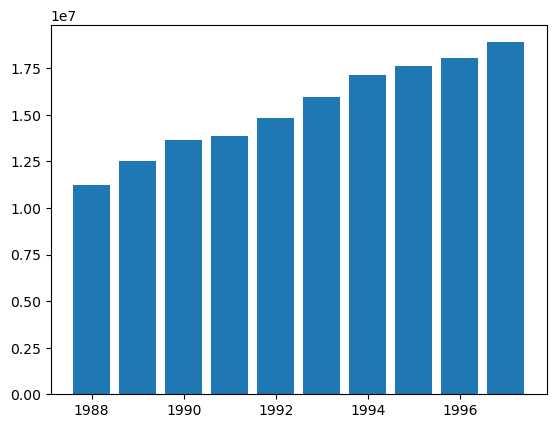

<IPython.core.display.Javascript object>

In [33]:
cc_result = cl.CapeCod().fit(
    clrd_tri["CumPaidLoss"].sum(), sample_weight=clrd_tri["EarnedPremDIR"].sum().latest_diagonal
)

plt.bar(
    cc_result.ultimate_.to_frame().index.year,
    cc_result.ultimate_.to_frame()["2261"],
)

# Pipelines

Pipeline is a tool that can streamline your workflow, it is a way to wrap multiple estimators into a single compact object. Let's see an example that includes a selection of development pattern and the chainladder model.

In [34]:
pipe = cl.Pipeline(
    steps=[
    ('dev', cl.Development(average='simple')),
    ('model', cl.Chainladder())])

pipe

Pipeline(steps=[('dev', Development(average='simple')),
                ('model', Chainladder())])

<IPython.core.display.Javascript object>

Once the pipeline is built, we can apply to any dataset we like, let's try it on the paid triangle and get their ultimate estimates.

In [35]:
pipe.fit(clrd_tri["CumPaidLoss"].sum()).named_steps.model.ultimate_

,2261
1988,"11,203,949"
1989,"12,529,085"
1990,"13,679,770"
1991,"13,886,233"
1992,"14,834,389"
1993,"15,957,788"
1994,"17,117,886"
1995,"17,455,921"
1996,"17,630,515"
1997,"18,620,572"


<IPython.core.display.Javascript object>

You can use the same pipeline on other datasets as well, let's try it on the incurred triangle, which again, is `IncurLoss` - `BulkLoss`.

In [36]:
pipe.fit(clrd_tri["IncurLoss"].sum() - clrd_tri["BulkLoss"].sum()).named_steps.model.ultimate_

,2261
1988,"11,327,627"
1989,"12,643,312"
1990,"13,788,051"
1991,"14,004,129"
1992,"14,938,810"
1993,"15,972,778"
1994,"17,102,452"
1995,"17,252,958"
1996,"17,157,374"
1997,"18,014,765"


<IPython.core.display.Javascript object>

# Stochastic Models

The Mack's Chainladder model is available.

In [37]:
mcl_mod = cl.MackChainladder().fit(clrd_tri["CumPaidLoss"].sum())
mcl_mod

MackChainladder()

<IPython.core.display.Javascript object>

There are many attributes that are available, such as `full_std_err_`, `total_process_risk_`, `total_parameter_risk_`, `mack_std_err_` and `total_mack_std_err_`.

In [38]:
mcl_mod.full_std_err_

,12,24,36,48,60,72,84,96,108,120
1988,0.0944,0.0199,0.0075,0.0051,0.0029,0.0010,0.0011,0.0019,0.0004,0.0000
1989,0.0883,0.0187,0.0071,0.0048,0.0027,0.0009,0.0011,0.0018,0.0004,0.0000
1990,0.0835,0.0178,0.0067,0.0046,0.0026,0.0009,0.0010,0.0017,0.0004,0.0000
1991,0.0828,0.0176,0.0067,0.0045,0.0026,0.0009,0.0010,0.0017,0.0004,0.0000
1992,0.0788,0.0169,0.0064,0.0044,0.0025,0.0009,0.0010,0.0016,0.0004,0.0000
1993,0.0751,0.0162,0.0062,0.0042,0.0024,0.0008,0.0009,0.0016,0.0004,0.0000
1994,0.0715,0.0156,0.0060,0.0041,0.0023,0.0008,0.0009,0.0015,0.0004,0.0000
1995,0.0702,0.0155,0.0060,0.0040,0.0023,0.0008,0.0009,0.0015,0.0004,0.0000
1996,0.0696,0.0156,0.0059,0.0040,0.0023,0.0008,0.0009,0.0015,0.0004,0.0000
1997,0.0703,0.0152,0.0058,0.0039,0.0023,0.0008,0.0009,0.0015,0.0003,0.0000


<IPython.core.display.Javascript object>

MackChainladder also has a `summary_` attribute.

In [39]:
mcl_mod.summary_

,Latest,IBNR,Ultimate,Mack Std Err
1988,"11,203,949",,"11,203,949",
1989,"12,492,899","36,186","12,529,085","7,613"
1990,"13,559,557","119,217","13,678,774","29,905"
1991,"13,642,414","242,415","13,884,829","34,341"
1992,"14,347,271","484,933","14,832,204","38,639"
1993,"15,005,138","946,618","15,951,756","58,394"
1994,"15,249,326","1,854,279","17,103,605","94,894"
1995,"14,010,098","3,418,299","17,428,397","139,873"
1996,"11,473,912","6,094,599","17,568,511","276,854"
1997,"6,451,896","11,967,706","18,419,602","793,559"


<IPython.core.display.Javascript object>

Let's make a graph, that shows the Paid and Unpaid as stacked bars, and error bars showing Mack Standard Errors.

/Users/kennethhsu/opt/anaconda3/lib/python3.9/site-packages/chainladder/core/pandas.py:62: UserWarning: In an upcoming version of the package, `origin_as_datetime` will be defaulted to `True` in to_frame(...), use `origin_as_datetime=False` to preserve current setting.
  warnings.warn(warning)
/Users/kennethhsu/opt/anaconda3/lib/python3.9/site-packages/chainladder/core/pandas.py:62: UserWarning: In an upcoming version of the package, `origin_as_datetime` will be defaulted to `True` in to_frame(...), use `origin_as_datetime=False` to preserve current setting.
  warnings.warn(warning)
/Users/kennethhsu/opt/anaconda3/lib/python3.9/site-packages/chainladder/core/pandas.py:62: UserWarning: In an upcoming version of the package, `origin_as_datetime` will be defaulted to `True` in to_frame(...), use `origin_as_datetime=False` to preserve current setting.
  warnings.warn(warning)
/Users/kennethhsu/opt/anaconda3/lib/python3.9/site-packages/chainladder/core/pandas.py:62: UserWarning: In an upcom

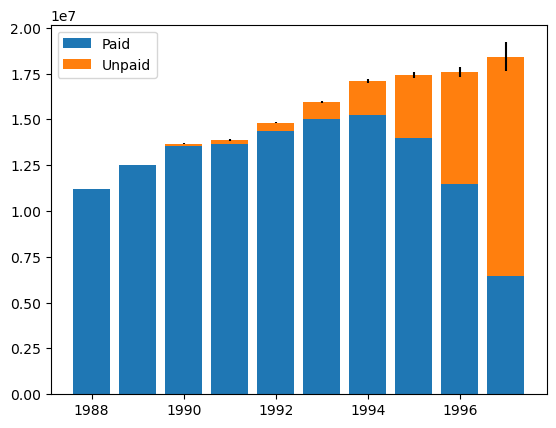

<IPython.core.display.Javascript object>

In [57]:
# bottom bar chart
plt.bar(
    mcl_mod.summary_.to_frame().index.year, # category, year
    mcl_mod.summary_.to_frame()["Latest"], # height, paid
    label="Paid",
)

# top bar chart
plt.bar(
    mcl_mod.summary_.to_frame().index.year, # category, year
    mcl_mod.summary_.to_frame()["IBNR"], # height, unpaid
    bottom=mcl_mod.summary_.to_frame()["Latest"], # height, paid
    yerr=mcl_mod.summary_.to_frame()["Mack Std Err"], # Mack's standard error
    label="Unpaid",
)

plt.legend(loc="upper left")

ODP Bootstrap is also available. Let's bootstrap 10,000 paid triangles.

In [52]:
clrd_tri_sampled = (
    cl.BootstrapODPSample(n_sims=10000).fit(clrd_tri["CumPaidLoss"].sum()).resampled_triangles_
)
clrd_tri_sampled

,Triangle Summary
Valuation:,1997-12
Grain:,OYDY
Shape:,"(10000, 1, 10, 10)"
Index:,[LOB]
Columns:,[CumPaidLoss]


<IPython.core.display.Javascript object>

We can fit a basic chainladder to all sampled triangles. We now have 10,000 simulated chainladder models, all (most) with unique LDFs.

In [53]:
cl_mod_bootstrapped = cl.Chainladder().fit(clrd_tri_sampled)
cl_mod_bootstrapped

/Users/kennethhsu/opt/anaconda3/lib/python3.9/site-packages/chainladder/tails/base.py:120: RuntimeWarning: overflow encountered in exp
  sigma_ = xp.exp(time_pd * reg.slope_ + reg.intercept_)
/Users/kennethhsu/opt/anaconda3/lib/python3.9/site-packages/chainladder/tails/base.py:124: RuntimeWarning: overflow encountered in exp
  std_err_ = xp.exp(time_pd * reg.slope_ + reg.intercept_)
/Users/kennethhsu/opt/anaconda3/lib/python3.9/site-packages/chainladder/tails/base.py:127: RuntimeWarning: invalid value encountered in multiply
  sigma_ = sigma_ * 0
/Users/kennethhsu/opt/anaconda3/lib/python3.9/site-packages/chainladder/tails/base.py:128: RuntimeWarning: invalid value encountered in multiply
  std_err_ = std_err_* 0


Chainladder()

<IPython.core.display.Javascript object>

We can use `predict()` to use the model characteristics (their unique LDFs) to predict our basic Incurred triangle. Let's inspect the prediction's means. 

In [54]:
cl_mod_bootstrapped.predict(clrd_tri["CumPaidLoss"].sum()).ultimate_.mean()

,2261
1988,"11,203,949"
1989,"12,529,300"
1990,"13,678,741"
1991,"13,884,695"
1992,"14,831,965"
1993,"15,951,056"
1994,"17,102,541"
1995,"17,426,957"
1996,"17,567,195"
1997,"18,417,845"


<IPython.core.display.Javascript object>

Let's make another graph.

/Users/kennethhsu/opt/anaconda3/lib/python3.9/site-packages/chainladder/core/pandas.py:62: UserWarning: In an upcoming version of the package, `origin_as_datetime` will be defaulted to `True` in to_frame(...), use `origin_as_datetime=False` to preserve current setting.
  warnings.warn(warning)
/Users/kennethhsu/opt/anaconda3/lib/python3.9/site-packages/chainladder/core/pandas.py:62: UserWarning: In an upcoming version of the package, `origin_as_datetime` will be defaulted to `True` in to_frame(...), use `origin_as_datetime=False` to preserve current setting.
  warnings.warn(warning)
/Users/kennethhsu/opt/anaconda3/lib/python3.9/site-packages/chainladder/core/pandas.py:62: UserWarning: In an upcoming version of the package, `origin_as_datetime` will be defaulted to `True` in to_frame(...), use `origin_as_datetime=False` to preserve current setting.
  warnings.warn(warning)


<BarContainer object of 10 artists>

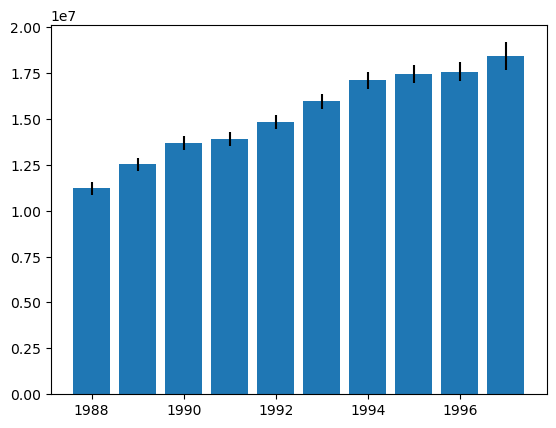

<IPython.core.display.Javascript object>

In [55]:
plt.bar(
    cl_mod_bootstrapped.ultimate_.mean().to_frame().index.year, #x-axis, accident year
    cl_mod_bootstrapped.ultimate_.mean().to_frame()["2261"], #y-axis, ultimates
    yerr=cl_mod_bootstrapped.ultimate_.std().to_frame()["2261"], #ultimates standard deviation
)